# Système linéaire

In [ ]:
#
#    Notebook de cours MAP412 - Chapitre 1 - M. Massot 2020-2021 - Ecole polytechnique
#    ----------   
#    Système Linéaire
#    
#    Auteurs : L. Séries et M. Massot - (C) 2021
#    

On veut résoudre le système linéaire suivant :

$$
A=\left[
\begin{array}{lll}
-\gamma & 1  \\
- 1              & 1  \\
\end{array}
\right]
\begin{pmatrix}
     x    \\
     y            \\
\end{pmatrix}
= \begin{pmatrix}
     -\beta    \\
     0              \\
\end{pmatrix}
$$

dont la solution est $x=\beta/(\gamma-1)$ et $y=\beta/(\gamma-1)$ correspondant aux coordonnées du point d'intersection des droites $y=x$ et $y=\gamma\,x - \beta$. On se placera autour d'un cas où $\gamma = 1+\alpha$ et $\beta = \alpha$, avec $\alpha$ petit devant 1.

## Cas où $\alpha$ est petit

Dans le cas où $\alpha$ est petit devant 1, comme représenté sur la figure suivante où il vaut 0.05, une petite perturbation, par exemple du second membre où $-\alpha$ devient $-\alpha-\epsilon$, implique une modification de la solution grande devant la  taille de la perturbation puisque la nouvelle solution vérifie toujours $\bar x=\bar y$ mais $\bar x=1+\epsilon/\alpha$.

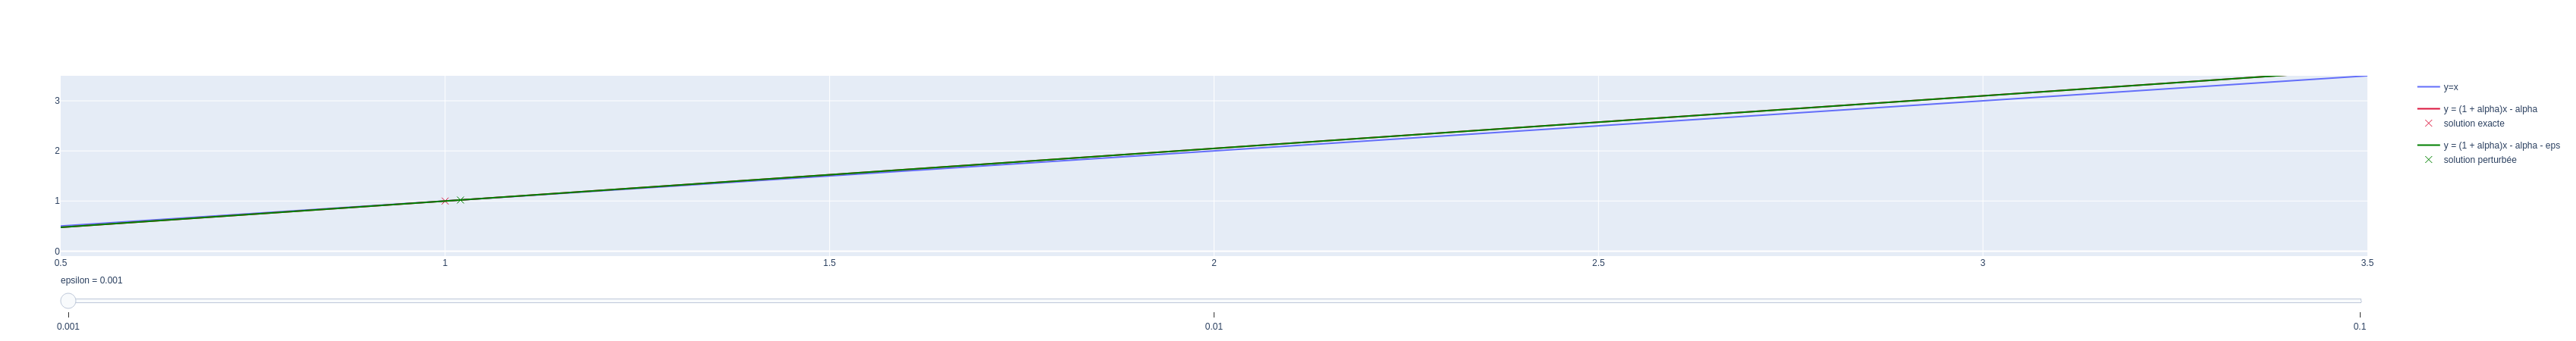

In [17]:
import plotly.graph_objects as go
import numpy as np

x = np.linspace(0.5, 3.5, 100)

alpha = 0.05

y1 = x
y2 = (1+alpha)*x - alpha

fig = go.Figure(layout_yaxis_range=[-0.1,3.5])

fig.add_trace(go.Scatter(x=x, y=y1, name="y=x"))

fig.add_trace(go.Scatter(x=x, y=y2, name="y = (1 + alpha)x - alpha", marker = dict(color="crimson"),
                         legendgroup="group",  legendgrouptitle_text="Problème original"))
fig.add_trace(go.Scatter(x=[1], y=[1], name="solution exacte", mode='markers', legendgroup="group",
                         marker = dict(symbol='x-thin', size=9, line_color="crimson", line_width=1)))

epsilon = np.array([0.001, 0.01, 0.1])
for i, eps_i in enumerate(epsilon):
    y_i = (1+alpha)*x - alpha - eps_i
    fig.add_trace(go.Scatter(x=x, y=y_i, name="y = (1 + alpha)x - alpha - eps", marker = dict(color="green"),
                             legendgroup="group2",  legendgrouptitle_text="Problème perturbé", showlegend=False,
                             visible=False))
    fig.add_trace(go.Scatter(x=[1+eps_i/alpha], y=[1+eps_i/alpha], name="solution perturbée", mode='markers',
                             marker = dict(symbol='x-thin', size=9, line_color="green", line_width=1),
                             legendgroup="group2", showlegend=False, visible=False))
    
fig.data[3].visible = True
fig.data[3].showlegend = True
fig.data[4].visible = True
fig.data[4].showlegend = True

# Create and add slider
steps = []
for i, eps_i in enumerate(epsilon):
    step = dict(method="update", label = f"{eps_i}", 
                args=[{"visible": [(el==2*i+3 or el==2*i+4 or el==0 or el==1 or el==2) for el in range(len(fig.data))]}])
    fig.data[2*i+3].showlegend = True
    fig.data[2*i+4].showlegend = True
    steps.append(step)

sliders = [dict(currentvalue={'prefix': 'epsilon = '}, steps=steps)]

fig.update_layout(sliders=sliders)
fig.show()

Dans ce cadre, on peut voir que la perturbation du second membre de l'ordre de $\epsilon$ implique une modification de la solution de $\epsilon/\alpha$, ce qui apporte une borne inférieure en $1/\alpha$ sur le conditionnement que l'on calculera en petite classe et qui est effectivement de l'ordre de $1/\alpha$. Pour $\alpha$ petit devant un, le conditionnement est mauvais et on pourra faire le lien avec le Chapitre 4 du cours où sera présenté le conditionnement d'une matrice.

## Cas où $\alpha = -2$ 

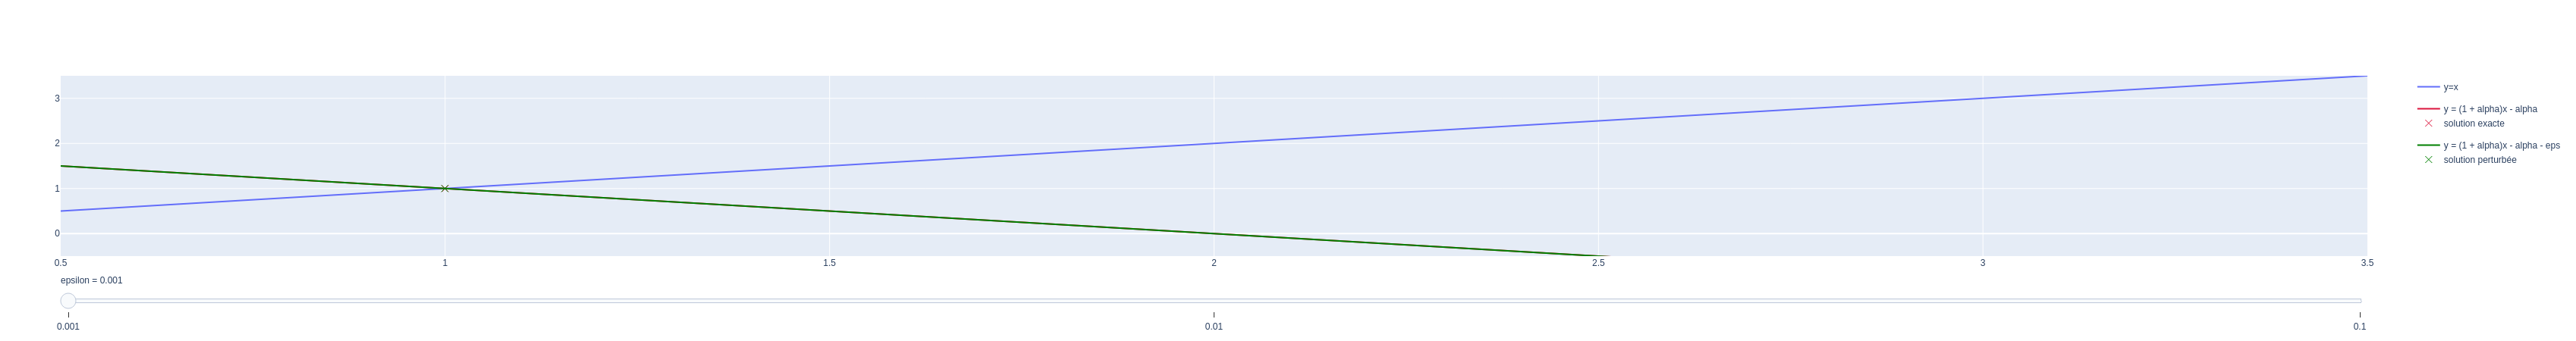

In [20]:
x = np.linspace(0.5, 3.5, 100)

alpha = -2

y1 = x
y2 = (1+alpha)*x - alpha

fig = go.Figure(layout_yaxis_range=[-0.5,3.5])

fig.add_trace(go.Scatter(x=x, y=y1, name="y=x"))
fig.add_trace(go.Scatter(x=x, y=y2, name="y = (1 + alpha)x - alpha", marker = dict(color="crimson"),
                         legendgroup="group",  legendgrouptitle_text="Problème original"))
fig.add_trace(go.Scatter(x=[1], y=[1], name="solution exacte", mode='markers', legendgroup="group",
                         marker = dict(symbol='x-thin', size=9, line_color="crimson", line_width=1)))

epsilon = np.array([0.001, 0.01, 0.1])
for i, eps_i in enumerate(epsilon):
    y_i = (1+alpha)*x - alpha - eps_i
    fig.add_trace(go.Scatter(x=x, y=y_i, name="y = (1 + alpha)x - alpha - eps", marker = dict(color="green"),
                             legendgroup="group2",  legendgrouptitle_text="Problème perturbé", showlegend=False,
                             visible=False))
    
    fig.add_trace(go.Scatter(x=[1+eps_i/alpha], y=[1+eps_i/alpha], name="solution perturbée", mode='markers',
                         marker = dict(symbol='x-thin', size=9, line_color="green", line_width=1),
                         legendgroup="group2", showlegend=False, visible=False))
    
fig.data[3].visible = True
fig.data[3].showlegend = True
fig.data[4].visible = True
fig.data[4].showlegend = True

# Create and add slider
steps = []
for i, eps_i in enumerate(epsilon):
    step = dict(method="update", label = f"{eps_i}", 
                args=[{"visible": [(el==2*i+3 or el==2*i+4 or el==0 or el==1 or el==2) for el in range(len(fig.data))]}])
    fig.data[2*i+3].showlegend = True
    fig.data[2*i+4].showlegend = True
    steps.append(step)

sliders = [dict(currentvalue={'prefix': 'epsilon = '}, steps=steps)]

fig.update_layout(sliders=sliders)
fig.show()

Dans ce cas, le conditionnement du problème est de l'ordre de $1$ et une modification du second membre induit une perturbation de l'ordre de $\epsilon/2$. Le problème est très bien conditionné et cela est uniquement associé à la structure mathématique du problème de départ (matrice plus ou moins proche d'une matrice singulière) et en rien à un problème d'évaluation algorithmique.